## Variable "hora"

Cargamos las librerias necesarias para la elaboracion y desarrollo de la minería de datos

In [45]:
!pip install plotly
import numpy as np #Operaciones matemáticas rápidas sobre matrices
import pandas as pd #biblioteca de análisis y manipulación de datos para Python
import plotly.express as px
import matplotlib.pyplot as plt #Proporciona una forma de trazado similar a MATLAB. pyplot está diseñado principalmente para gráficos interactivos y casos simples de generación de tramas programáticas. La API orientada a objetos se recomienda para gráficos más complejos.
import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
import statsmodels.api as sm

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')
#Dataset
# ------------------------------------------------------------------------------
df= pd.read_csv('AT2021_NBD.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,fecha,dia,hora,latitud,longitud,tipologia,direccion,zona,parroquia_urbana,causas,gravedad,nro_heridos,nro_fallecidos,vehiculos_retenidos,senalizacion_existente,condicion_calzada,condicion_atmosferica
0,01-01,viernes,h11,-3.991993,-79.201155,estrellamiento,orillas del zamora y jose felix de valdivieso,urbana,el valle,conducir en estado de embriaguez,grave,1,0,3,senalizacion horizontal y vertical,bueno,lluvia
1,01-05,martes,h17,-4.020370,-79.217962,choque lateral perpendicular,benjamin carrion y gustavo serrano,urbana,punzara,conducir en estado de embriaguez,grave,1,0,2,senalizacion vertical,bueno,lluvia
2,01-05,martes,h12,-3.987230,-79.202984,choque por alcance,nueva loja y guaranda,urbana,sucre,no mantener la distancia reglamentaria,leve,0,0,2,senalizacion vertical,regular,lluvia
3,01-08,viernes,h10,-3.989410,-79.236506,atropello,angel felicisimo rojas,urbana,sucre,imprudencia del peaton,grave,1,0,1,senalizacion vertical,regular,despejado
4,01-09,sabado,h06,-3.979784,-79.218689,choque lateral angular,isidro ayora y habana,urbana,sucre,conducir en estado de embriaguez,leve,0,0,2,senalizacion horizontal y vertical,bueno,lluvia


Graficamos el mapa de calor de accidentabilidad dentro del cantón Loja

In [46]:
fig = px.density_mapbox(df,lat='latitud', lon='longitud',radius=3,center=dict(lat=-3.99313,lon=-79.20422),zoom=10.5,mapbox_style="open-street-map")

fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [47]:
#verifico datos nulos
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



fecha                     0
dia                       0
hora                      0
latitud                   1
longitud                  1
tipologia                 0
direccion                 0
zona                      0
parroquia_urbana          0
causas                    0
gravedad                  0
nro_heridos               0
nro_fallecidos            0
vehiculos_retenidos       0
senalizacion_existente    0
condicion_calzada         0
condicion_atmosferica     0
dtype: int64

In [48]:
df=df.loc[:,df.columns!="fecha"]
df=df.loc[:,df.columns!="zona"]
df=df.loc[:,df.columns!="latitud"]
df=df.loc[:,df.columns!="longitud"]
df=df.loc[:,df.columns!="direccion"]
df=df.loc[:,df.columns!="gravedad"]
df=df.loc[:,df.columns!="vehiculos_retenidos"]
df=df.loc[:,df.columns!="senalizacion_existente"]
df=df.loc[:,df.columns!="condicion_calzada"]
df=df.loc[:,df.columns!="condicion_atmosferica"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [49]:
df.isnull().sum()

dia                 0
hora                0
tipologia           0
parroquia_urbana    0
causas              0
nro_heridos         0
nro_fallecidos      0
dtype: int64

In [50]:
df.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
219,lunes,h21,choque lateral perpendicular,el sagrario,imprudencia del conductor,2,0
137,lunes,h11,choque lateral perpendicular,san sebastian,no respetar las senales de transito,0,0
83,viernes,h23,perdida de carril,sucre,conducir en exceso de velocidad,2,0
39,sabado,h16,estrellamiento,carigan,imprudencia del conductor,1,0
57,martes,h07,choque lateral perpendicular,san sebastian,imprudencia del conductor,0,0
187,sabado,h21,estrellamiento,el sagrario,conducir en estado de embriaguez,0,0
101,martes,h21,choque lateral angular,el sagrario,conducir en exceso de velocidad,1,0
277,sabado,h23,estrellamiento,el valle,conducir en exceso de velocidad,0,0
169,domingo,h10,estrellamiento,carigan,imprudencia del conductor,1,0
364,martes,h10,choque lateral perpendicular,san sebastian,imprudencia del conductor,1,0


In [51]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,viernes,h11,estrellamiento,el valle,conducir en estado de embriaguez,1,0
1,martes,h17,choque lateral perpendicular,punzara,conducir en estado de embriaguez,1,0
2,martes,h12,choque por alcance,sucre,no mantener la distancia reglamentaria,0,0
3,viernes,h10,atropello,sucre,imprudencia del peaton,1,0
4,sabado,h06,choque lateral angular,sucre,conducir en estado de embriaguez,0,0


In [52]:
ds=pd.DataFrame(df)
#Presenta el numero de filas
print("El numero de filas(observaciones) es: ",ds.shape[0])

#Presenta el numero de columnas
print("El numero de columnas(variables) es: ",len(ds.columns))

El numero de filas(observaciones) es:  370
El numero de columnas(variables) es:  7


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [53]:
# tipos de la variables
ds.dtypes

dia                 object
hora                object
tipologia           object
parroquia_urbana    object
causas              object
nro_heridos          int64
nro_fallecidos       int64
dtype: object

In [54]:
df.shape[0]

370

In [55]:
df['causas'].value_counts()

imprudencia del conductor                 161
conducir en estado de embriaguez           88
conducir en exceso de velocidad            75
imprudencia del peaton                     15
no respetar las senales de transito        15
fallas mecanicas no previsibles             6
no mantener la distancia reglamentaria      2
condiciones climaticas desfavorables        2
no ceder el derecho de via                  2
impericia del conductor                     2
cruce de animales en la via                 2
Name: causas, dtype: int64

In [56]:
print(df['causas'].unique())# datos en texto

['conducir en estado de embriaguez'
 'no mantener la distancia reglamentaria' 'imprudencia del peaton'
 'conducir en exceso de velocidad' 'no respetar las senales de transito'
 'condiciones climaticas desfavorables' 'no ceder el derecho de via'
 'impericia del conductor' 'imprudencia del conductor'
 'fallas mecanicas no previsibles' 'cruce de animales en la via']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [57]:
print(df['causas'].unique())# datos en texto

['conducir en estado de embriaguez'
 'no mantener la distancia reglamentaria' 'imprudencia del peaton'
 'conducir en exceso de velocidad' 'no respetar las senales de transito'
 'condiciones climaticas desfavorables' 'no ceder el derecho de via'
 'impericia del conductor' 'imprudencia del conductor'
 'fallas mecanicas no previsibles' 'cruce de animales en la via']


Transformamos los datos a numéricos

In [58]:
df['causas']= df['causas'].apply(lambda x:
                                    1 if x == 'conducir en estado de embriaguez' else
                                    2 if x == 'imprudencia del conductor' else
                                    3 if x == 'no ceder el derecho de via' else
                                    4 if x == 'conducir en exceso de velocidad' else
                                    5 if x == 'cambio brusco e indebido de carril' else
                                    6 if x == 'fallas mecanicas no previsibles' else
                                    7 if x == 'no respetar las senales de transito' else
                                    8 if x == 'invadir carril de circulacion' else
                                    9 if x == 'imprudencia del peaton' else
                                    10 if x == 'no mantener la distancia reglamentaria' else
                                    11 if x == 'razones desconocidas' else
                                    12 if x == 'condiciones climaticas desfavorables' else
                                    13 if x == 'negligencia del conductor' else
                                    14 if x == 'no respetar las ordenes del agente de transito' else
                                    15 if x == 'impericia del conductor' else
                                    16)


In [59]:
print(df['parroquia_urbana'].unique()) # datos convertidos a numeros enteros

['el valle' 'punzara' 'sucre' 'san sebastian' 'carigan' 'el sagrario']


In [60]:
df['parroquia_urbana']= df['parroquia_urbana'].apply(lambda x:
                                    1 if x == 'el sagrario' else
                                    2 if x == 'san sebastian' else
                                    3 if x == 'el valle' else
                                    4 if x == 'sucre' else
                                    5 if x == 'punzara' else
                                    6 if x == 'carigan' else
                                    7)

In [61]:
print(df['parroquia_urbana'].unique()) # datos convertidos a numeros enteros

[3 5 4 2 6 1]


In [62]:
print(df['tipologia'].unique()) # datos convertidos a numeros enteros

['estrellamiento' 'choque lateral perpendicular' 'choque por alcance'
 'atropello' 'choque lateral angular' 'roce negativo' 'perdida de carril'
 'perdida de pista' 'choque frontal excentrico' 'colision' 'atipico'
 'arrollamiento' 'volcamiento' 'roce positivo' 'rozamiento'
 'caida de pasajero']


In [63]:
df['tipologia']= df['tipologia'].apply(lambda x:
                                    1 if x == 'arrollamiento' else
                                    2 if x == 'atipico' else
                                    3 if x == 'atropello' else
                                    4 if x == 'caida de pasajero' else
                                    5 if x == 'choque frontal' else
                                    6 if x == 'choque frontal excentrico' else
                                    7 if x == 'choque frontal longitudinal' else
                                    8 if x == 'choque lateral angular' else
                                    9 if x == 'choque lateral perpendicular' else
                                    10 if x == 'choque por alcance' else
                                    11 if x == 'colision' else
                                    12 if x == 'encunetamiento' else
                                    13 if x == 'estrellamiento' else
                                    14 if x == 'perdida de carril' else
                                    15 if x == 'perdida de pista' else
                                    16 if x == 'roce negativo' else
                                    17 if x == 'roce positivo' else
                                    18 if x == 'rozamiento' else
                                    19 if x == 'volcamiento' else
                                    20 if x == 'volcamiento lateral' else
                                    21)

In [64]:
print(df['tipologia'].unique()) # datos convertidos a numeros enteros

[13  9 10  3  8 16 14 15  6 11  2  1 19 17 18  4]


In [65]:
df['dia']= df['dia'].apply(lambda x:
                                    1 if x == 'lunes' else
                                    2 if x == 'martes' else
                                    3 if x == 'miercoles' else
                                    4 if x == 'jueves' else
                                    5 if x == 'viernes' else
                                    6 if x == 'sabado' else
                                    7 )

In [66]:
print(df['dia'].unique()) # datos convertidos a numeros enteros

[5 2 6 7 1 4 3]


In [67]:
df= df[df['parroquia_urbana'] <= 6]

In [68]:
df['hora']= df['hora'].apply(lambda x:
                                    0 if x == 'h00' else
                                    0 if x == 'h01' else
                                    0 if x == 'h02' else
                                    0 if x == 'h03' else
                                    0 if x == 'h04' else
                                    0 if x == 'h05' else
                                    1 if x == 'h06' else
                                    1 if x == 'h07' else
                                    1 if x == 'h08' else
                                    1 if x == 'h09' else
                                    1 if x == 'h10' else
                                    1 if x == 'h11' else
                                    2 if x == 'h12' else
                                    2 if x == 'h13' else
                                    2 if x == 'h14' else
                                    2 if x == 'h15' else
                                    2 if x == 'h16' else
                                    2 if x == 'h17' else
                                    3 if x == 'h18' else
                                    3 if x == 'h19' else
                                    3 if x == 'h20' else
                                    3 if x == 'h21' else
                                    3 if x == 'h22' else
                                    3)

In [69]:
df.head()

,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,5,1,13,3,1,1,0
1,2,2,9,5,1,1,0
2,2,2,10,4,10,0,0
3,5,1,3,4,9,1,0
4,6,1,8,4,1,0,0


In [70]:
# datos aleatorios (muestra de 10 elementos)

df.sample(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
174,4,3,8,4,2,0,0
133,6,3,10,5,1,0,0
179,7,0,13,4,2,0,0
353,3,2,9,4,2,0,0
38,7,0,13,4,4,0,0
83,5,3,14,4,4,2,0
75,3,2,8,2,2,0,0
102,5,0,13,4,1,0,0
369,4,3,10,4,1,0,0
89,3,3,13,3,1,0,0


Verificacion de correlacion de variables

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



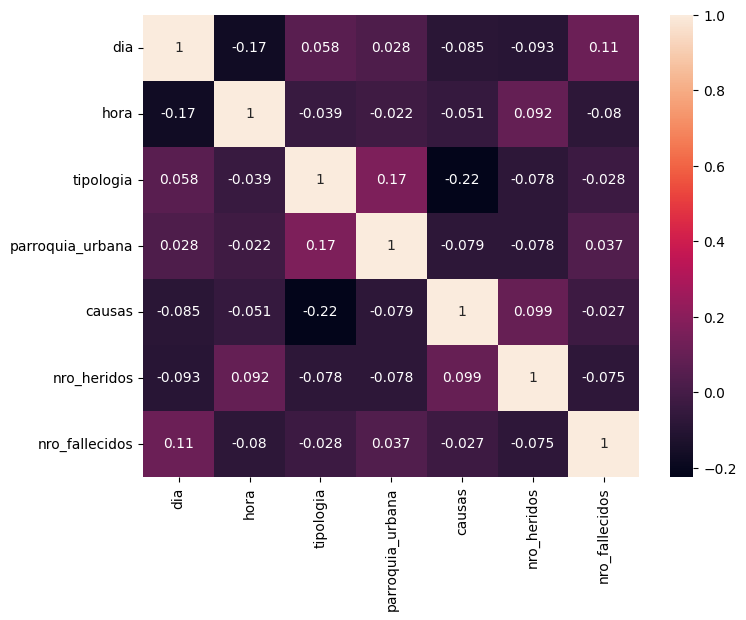

In [71]:
#corelacion
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

Seleccionamos la columna que vamos a predecir los datos

In [72]:
X = df.iloc[:, [0,2,3,4,5,6]] # atributos de entrada seran las primeras columnas
Y = df.iloc[:,[1]] # atributos de destino

#presentacion de los atributos de entrada
X.head()

,dia,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos
0,5,13,3,1,1,0
1,2,9,5,1,1,0
2,2,10,4,10,0,0
3,5,3,4,9,1,0
4,6,8,4,1,0,0


In [73]:
feature_names = X.columns.tolist()

# Imprimir los nombres de las características
print(feature_names)

['dia', 'tipologia', 'parroquia_urbana', 'causas', 'nro_heridos', 'nro_fallecidos']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Revisamos la columna a predecir seleccionada

In [74]:
#presentacion de los atributos de destino
Y.head()

,hora
0,1
1,2
2,2
3,1
4,1


Cargamos de modelo 2018-2020

In [75]:
from joblib import load
arbol_modelo = load('modelo_hora_python.joblib')
y_pred = arbol_modelo.predict(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



Verificamos los datos a predecir

In [76]:
print(y_pred)

[0 3 2 2 3 2 0 0 3 2 0 3 3 2 2 2 0 3 0 3 2 3 0 0 2 2 2 2 0 0 2 3 2 2 3 0 2
 0 0 0 2 0 0 0 0 0 3 2 0 2 0 2 3 0 0 2 3 2 2 2 2 2 0 2 0 2 0 2 2 2 3 2 3 3
 3 2 0 2 2 2 2 0 0 0 2 2 2 2 3 0 2 0 2 3 0 2 0 2 0 2 0 2 0 0 2 2 2 2 2 2 0
 2 2 3 0 3 2 2 2 3 0 2 0 3 3 0 2 0 2 2 0 0 0 3 0 0 3 2 2 2 0 2 3 3 2 0 0 0
 2 2 2 2 2 2 2 2 0 2 0 0 3 2 0 2 2 3 2 2 0 0 3 2 3 2 2 3 2 2 0 0 2 2 2 0 3
 0 0 0 0 3 2 0 0 2 2 2 0 0 0 2 3 0 2 2 2 2 2 0 2 0 2 2 0 0 0 0 0 0 2 2 2 0
 0 2 2 0 2 0 2 2 0 0 0 0 2 0 2 2 2 0 2 2 2 0 2 2 2 2 2 2 0 2 2 2 0 0 2 3 2
 0 2 0 2 2 2 2 3 2 0 2 2 0 2 2 0 0 2 0 2 2 0 2 2 2 2 0 0 3 0 2 3 0 0 0 3 2
 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 3 2 0 2 2 3 0 2 3 2 0 0 0 0 0 0 0 0 0 2 2
 0 2 2 0 0 2 0 2 3 2 2 2 2 2 2 0 2 3 2 2 2 2 2 2 3 2 2 2 0 3 2 2 2 2 2 3 3]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Configuramos la metrica de clasificación

In [77]:
# Resumen de las predicciones hechas por el clasificador
from sklearn import metrics
reporte = metrics.classification_report(Y, y_pred,output_dict=True)
pre = pd.DataFrame(reporte).transpose()
print(pre)
pre.to_excel("resumen_precision_hora_2021.xlsx")

              precision    recall  f1-score     support
0              0.357664  0.742424  0.482759   66.000000
1              0.000000  0.000000  0.000000   80.000000
2              0.409836  0.681818  0.511945  110.000000
3              0.600000  0.263158  0.365854  114.000000
accuracy       0.416216  0.416216  0.416216    0.416216
macro avg      0.341875  0.421850  0.340139  370.000000
weighted avg   0.370508  0.416216  0.351036  370.000000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not foun

Predicciones de los datos obtenidas

In [78]:
pred = pd.DataFrame(y_pred)
pred.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,0
0,0
1,3
2,2
3,2
4,3


Generamos la matriz de confusión

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



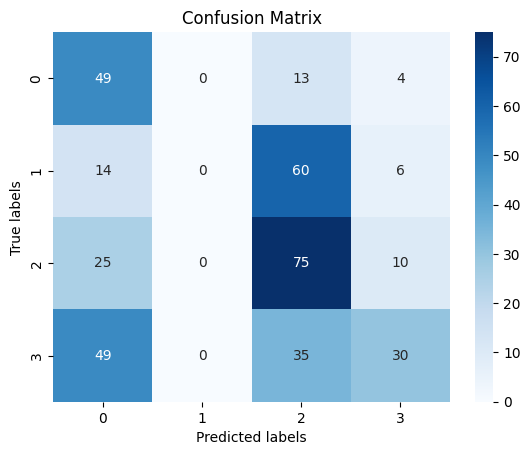

In [79]:
#Matriz de confusion
matriz=confusion_matrix(Y, y_pred)
ax= plt.subplot()
sns.heatmap(matriz, annot=True, cmap="Blues",fmt='g');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');

Concatenamos los datos de las horas originales con los datos predichos

In [80]:
#Para concatenar variables
import pandas as pd

prediccion = pd.DataFrame(y_pred,columns=['hora_prediccion'])
original = Y
original.reset_index(drop=True, inplace=True)
df_combined = pd.concat([prediccion,original], axis=1)
df_combined.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,hora_prediccion,hora
0,0,1
1,3,2
2,2,2
3,2,1
4,3,1
5,2,1
6,0,2
7,0,3
8,3,0
9,2,2


Visualizamos la exactitud del modelo

In [81]:
# Precisión
from sklearn.metrics import accuracy_score, recall_score, precision_score
print('Exactitud árboles de decisión: ',accuracy_score(pred,Y)*100)
print('Exhaustividad árboles de decisión: ', recall_score(pred,Y,average='micro')*100)
print('Precision árboles de decisión: ',accuracy_score(pred,Y)*100)

Exactitud árboles de decisión:  41.62162162162162
Exhaustividad árboles de decisión:  41.62162162162162
Precision árboles de decisión:  41.62162162162162


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Transformamos las variables

In [82]:
#transformar datos para visualización de variables predictoras y originales
df_combined['hora']= df_combined['hora'].apply(lambda x:
                                    'h00-h05' if x == 0 else
                                    'h06-h011' if x == 1 else
                                    'h012-h17' if x == 2 else
                                    'h18-h23')

df_combined['hora_prediccion']= df_combined['hora_prediccion'].apply(lambda x:
                                    'h00-h05' if x == 0 else
                                    'h06-h011' if x == 1 else
                                    'h012-h17' if x == 2 else
                                    'h18-h23')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Graficamos las estadisticas originales de los datos

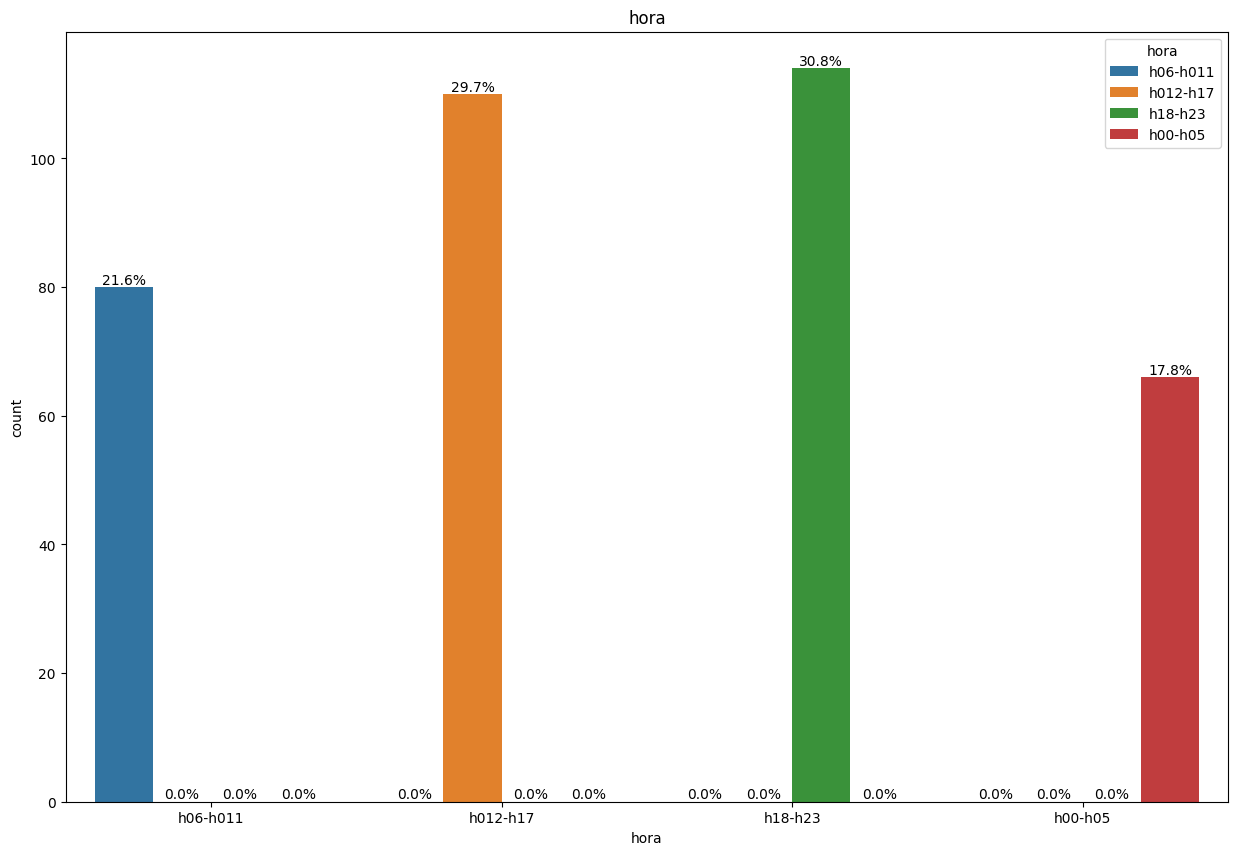

In [83]:
import seaborn as sns #permite generar fácilmente elegantes gráficos, proporciona una interfaz de alto nivel que es realmente sencilla de aprender.
ax = plt.subplots(figsize = (15,10))
ncount=len(df_combined)
#ax[1].plot(df['dia'],df['hora'],color = 'tab:purple')
sns.countplot(x='hora',hue = 'hora', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('hora')



for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras original
ax[0].savefig("barras_original_hora_2021.png")

Graficamos las estadisticas predecidas de los datos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



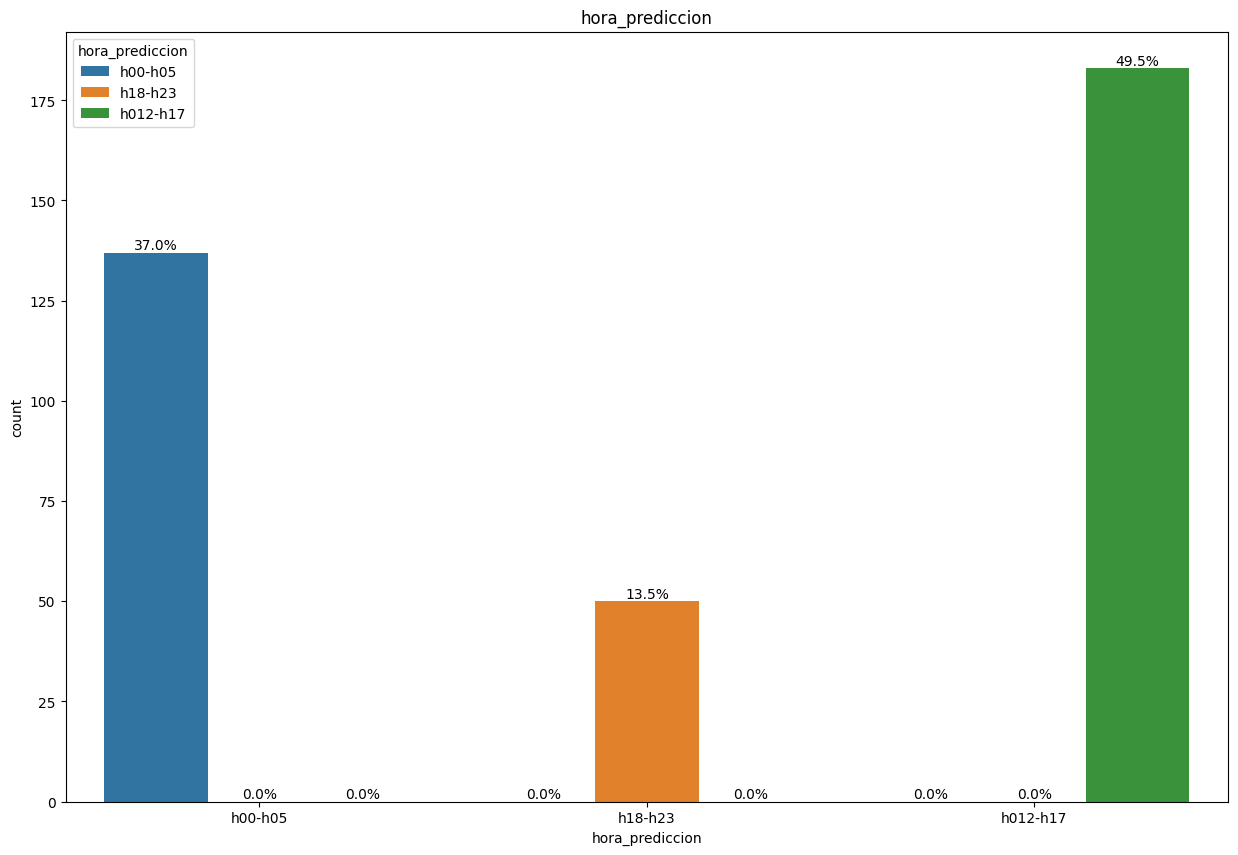

In [84]:
ax = plt.subplots(figsize = (15,10))
ncount=len(df_combined)
sns.countplot(x='hora_prediccion',hue = 'hora_prediccion', data = df_combined, ax = ax[1]) #Muestre el conteo de observaciones en cada contenedor categórico usando barras.
ax[1].set_title('hora_prediccion')


for p in ax[1].patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax[1].annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y),
            ha='center', va='bottom') # set the alignment of the text

#Guardamos la figura de barras de predicción
ax[0].savefig("barras_prediccion_hora_2021.png")

Crear el arbol de desición actual con el modelo con datos predichos del 2021

In [85]:
#target_names_str = [str(name) for name in target_names]
variable = df['hora'].apply(lambda x:
                                    'h00-h05' if x == 0 else
                                    'h06-h011' if x == 1 else
                                    'h012-h17' if x == 2 else
                                    'h18-h23')
claseVar = variable.unique().tolist()
target_names_str = [str(name) for name in claseVar]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Creamos la figura del arbol

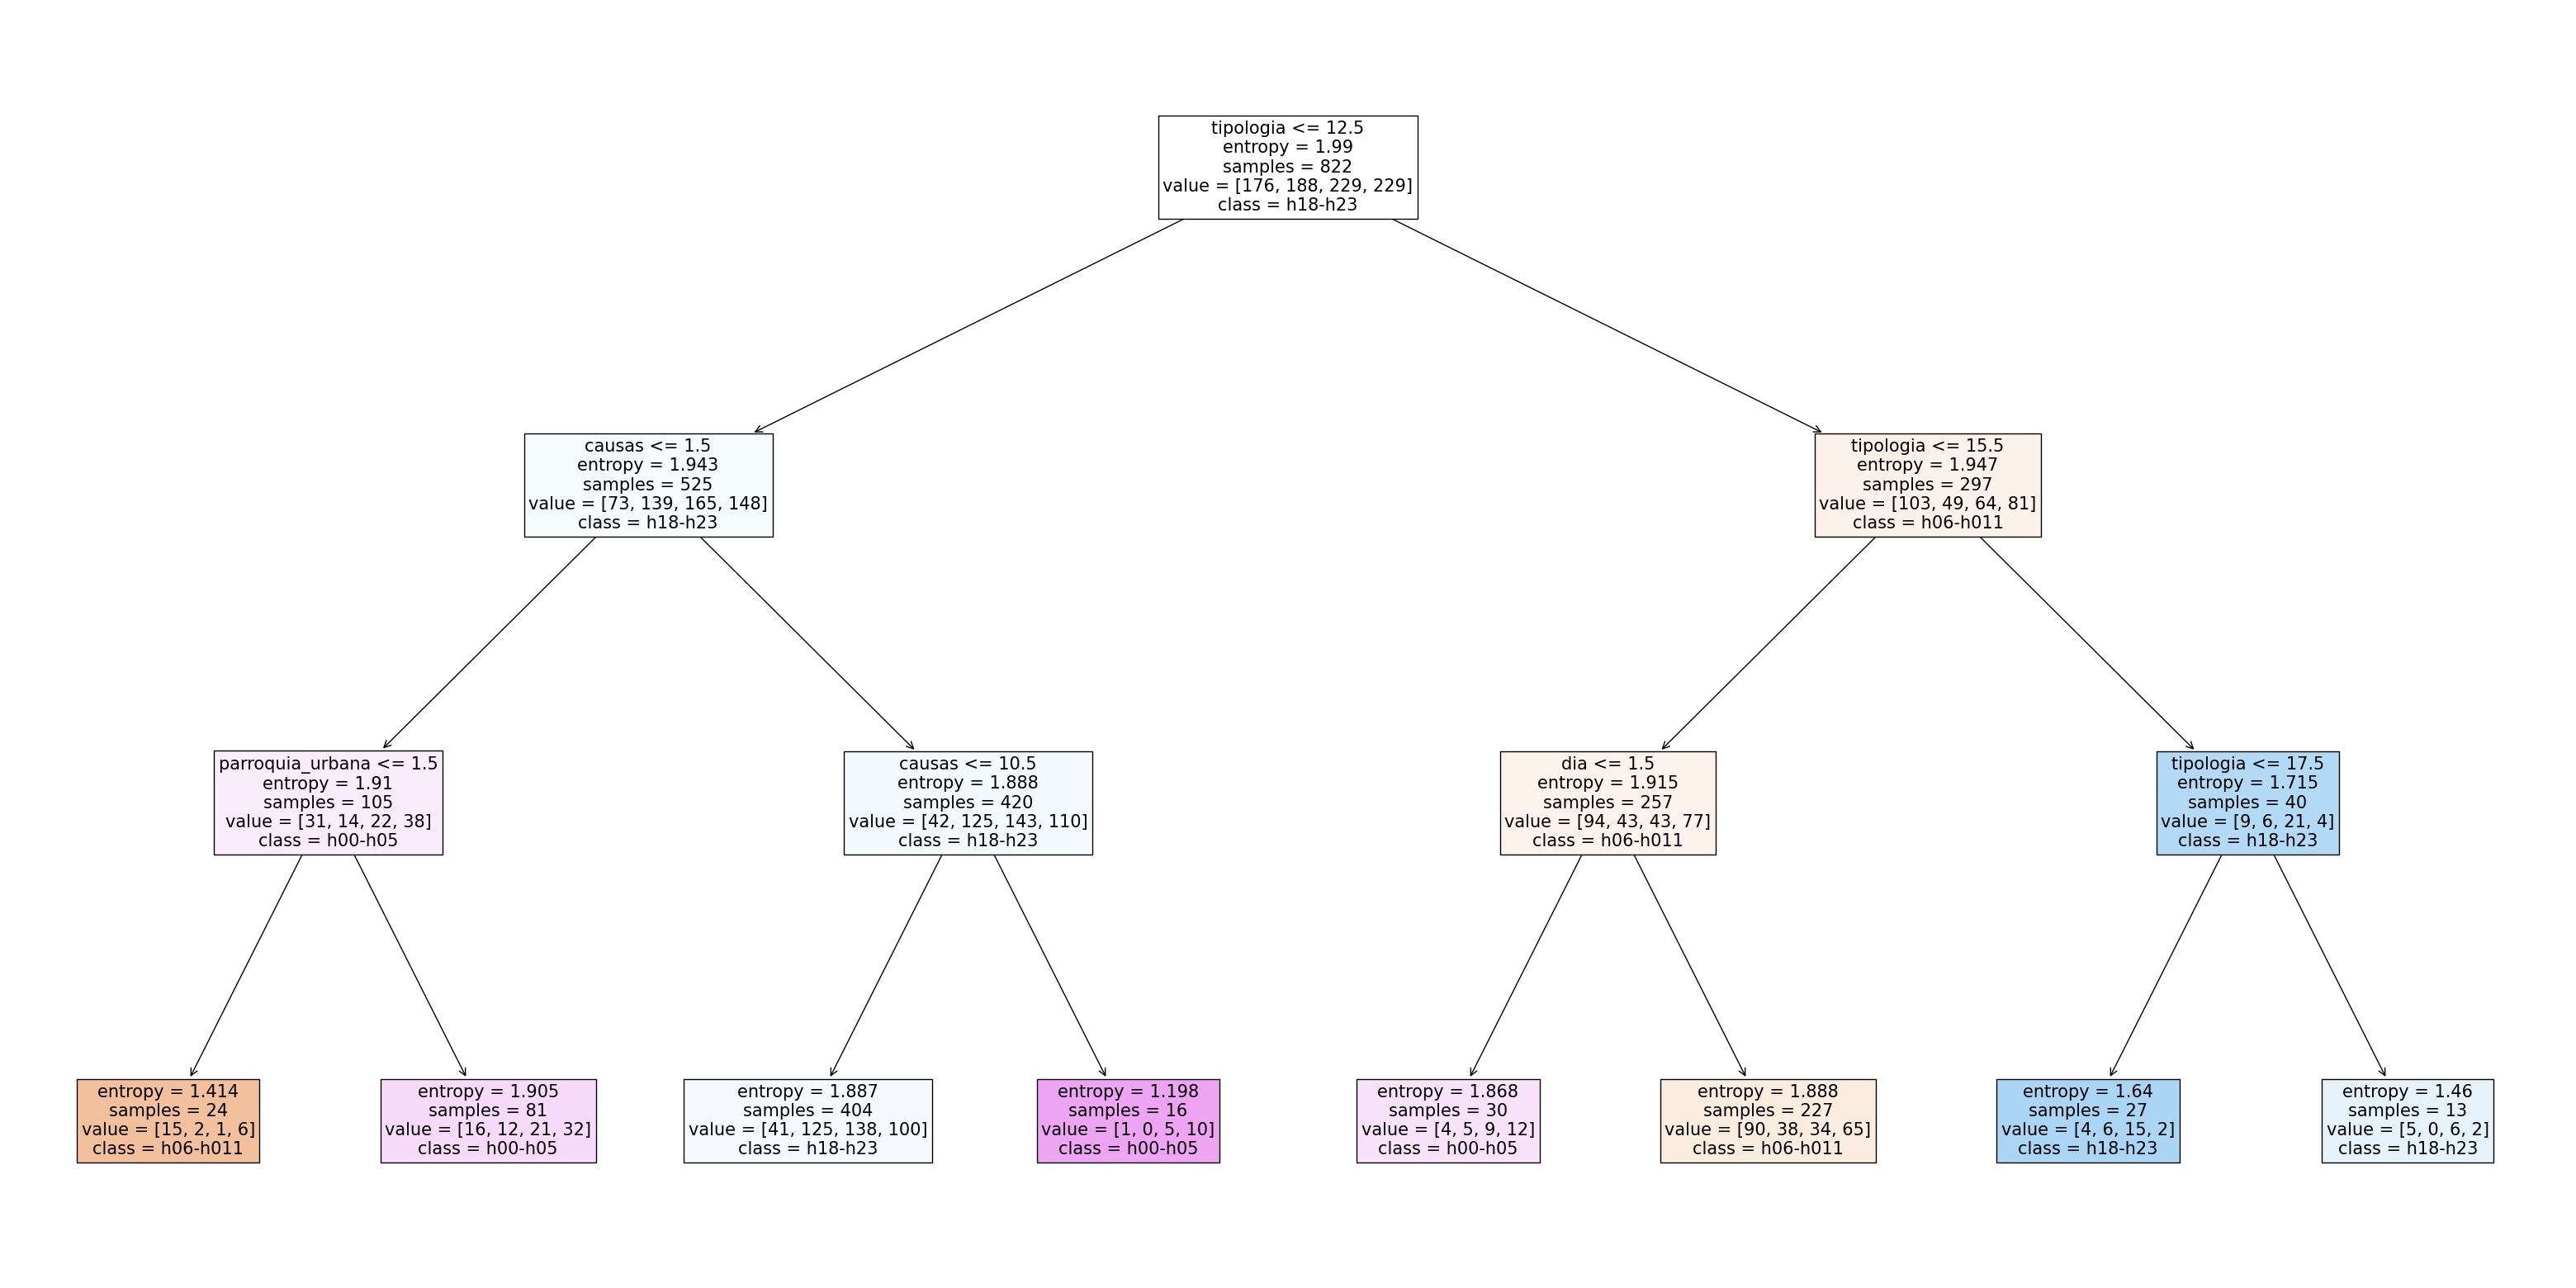

In [86]:
figura_arbol = plt.figure(figsize=(40,20)) # Le indicamos las dimensiones que queremos que tenga
plot_tree(arbol_modelo,feature_names=feature_names,filled=True, class_names=target_names_str, fontsize=15)
plt.show()

In [87]:
figura_arbol.savefig("arbol_colab_hora_2021.png")

Verificamos la probabilidad de los accidentes de tránsito a través de la predicción del modelo

In [88]:
#Verificamos la probabilidad de todas las variables
y_proba = arbol_modelo.predict_proba(X)
probabilidad_acierto = np.round(y_proba[0][y_pred] * 100, 2)
print("Probabilidad de Acierto: " + str(probabilidad_acierto) + "%")

Probabilidad de Acierto: [39.65 28.63 14.98 14.98 28.63 14.98 39.65 39.65 28.63 14.98 39.65 28.63
 28.63 14.98 14.98 14.98 39.65 28.63 39.65 28.63 14.98 28.63 39.65 39.65
 14.98 14.98 14.98 14.98 39.65 39.65 14.98 28.63 14.98 14.98 28.63 39.65
 14.98 39.65 39.65 39.65 14.98 39.65 39.65 39.65 39.65 39.65 28.63 14.98
 39.65 14.98 39.65 14.98 28.63 39.65 39.65 14.98 28.63 14.98 14.98 14.98
 14.98 14.98 39.65 14.98 39.65 14.98 39.65 14.98 14.98 14.98 28.63 14.98
 28.63 28.63 28.63 14.98 39.65 14.98 14.98 14.98 14.98 39.65 39.65 39.65
 14.98 14.98 14.98 14.98 28.63 39.65 14.98 39.65 14.98 28.63 39.65 14.98
 39.65 14.98 39.65 14.98 39.65 14.98 39.65 39.65 14.98 14.98 14.98 14.98
 14.98 14.98 39.65 14.98 14.98 28.63 39.65 28.63 14.98 14.98 14.98 28.63
 39.65 14.98 39.65 28.63 28.63 39.65 14.98 39.65 14.98 14.98 39.65 39.65
 39.65 28.63 39.65 39.65 28.63 14.98 14.98 14.98 39.65 14.98 28.63 28.63
 14.98 39.65 39.65 39.65 14.98 14.98 14.98 14.98 14.98 14.98 14.98 14.98
 39.65 14.98 39.65 39.65 2

In [89]:
print(type(probabilidad_acierto))
columna_probabilidades = pd.DataFrame()
columna_probabilidades['probabilidad'] = pd.DataFrame(probabilidad_acierto)
print(columna_probabilidades)

<class 'numpy.ndarray'>
     probabilidad
0           39.65
1           28.63
2           14.98
3           14.98
4           28.63
..            ...
365         14.98
366         14.98
367         14.98
368         28.63
369         28.63

[370 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Presentamos la probabilidad de los datos

In [90]:
y_prediccion = pd.DataFrame()
y_prediccion['predicciones'] = pd.DataFrame(y_pred)

probabilidades_2021_df = pd.concat([df,columna_probabilidades, y_prediccion], axis=1)
probabilidades_2021_df.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos,probabilidad,predicciones
185,7,1,13,6,1,0,0,39.65,0
77,5,2,9,1,2,2,0,14.98,2
51,3,2,9,6,2,0,0,14.98,2
11,5,2,8,4,12,0,0,28.63,3
314,7,1,10,1,1,1,0,39.65,0
187,6,3,13,1,1,0,0,39.65,0
126,2,2,8,3,2,2,0,14.98,2
328,6,2,13,5,2,0,0,39.65,0
4,6,1,8,4,1,0,0,28.63,3
25,2,1,9,1,4,0,0,14.98,2


In [91]:
probabilidades_2021_df['predicciones']= probabilidades_2021_df['predicciones'].apply(lambda x:
                                    'h00-h05' if x == 0 else
                                    'h06-h011' if x == 1 else
                                    'h012-h17' if x == 2 else
                                    'h18-h23')
probabilidades_2021_df['dia']= probabilidades_2021_df['dia'].apply(lambda x:
                                    'lunes' if x == 1 else
                                    'martes' if x == 2 else
                                    'miercoles' if x == 3 else
                                    'jueves' if x == 4 else
                                    'viernes' if x == 5 else
                                    'sabado' if x == 6 else
                                    'domingo' )
probabilidades_2021_df['hora']= probabilidades_2021_df['hora'].apply(lambda x:
                                    'h00-h05' if x == 0 else
                                    'h06-h011' if x == 1 else
                                    'h012-h17' if x == 2 else
                                    'h18-h23')

probabilidades_2021_df['parroquia_urbana']= probabilidades_2021_df['parroquia_urbana'].apply(lambda x:
                                    'el sagrario' if x == 1 else
                                    'san sebastian' if x == 2 else
                                    'el valle' if x == 3 else
                                    'sucre' if x == 4 else
                                    'punzara' if x == 5 else
                                    'carigan')

probabilidades_2021_df['tipologia']= probabilidades_2021_df['tipologia'].apply(lambda x:
                                    'arrollamiento' if x == 1 else
                                    'atipico' if x == 2 else
                                    'atropello' if x == 3 else
                                    'caida pasajero' if x == 4 else
                                    'choque frontal' if x == 5 else
                                    'choque frontal excentrico' if x == 6 else
                                    'choque frontal longitudinal' if x == 7 else
                                    'choque lateral angular' if x == 8 else
                                    'choque lateral perpendicular' if x == 9 else
                                    'choque alcance' if x == 10 else
                                    'colision' if x == 11 else
                                    'encunetamiento' if x == 12 else
                                    'estrellamiento' if x == 13 else
                                    'perdida carril' if x == 14 else
                                    'perdida pista' if x == 15 else
                                    'roce negativo' if x == 16 else
                                    'roce posositivo' if x == 17 else
                                    'rozamiento' if x == 18 else
                                    'volcamiento' if x == 19 else
                                    'volcamiento lateral' if x == 20 else
                                    'volcamiento longitudinal')

probabilidades_2021_df['causas']= probabilidades_2021_df['causas'].apply(lambda x:
                                    'conducir en estado de embriaguez' if x == 1 else
                                    'imprudencia del conductor' if x == 2 else
                                    'no ceder el derecho de via' if x == 3 else
                                    'conducir en exceso de velocidad' if x == 4 else
                                    'cambio brusco e indebido de carril' if x == 5 else
                                    'fallas mecanicas no previsibles' if x == 6 else
                                    'no respetar las senales de transito' if x == 7 else
                                    'invadir carril de circulacion' if x == 8 else
                                    'imprudencia del peaton' if x == 9 else
                                    'no mantener la distancia reglamentaria' if x == 10 else
                                    'razones desconocidas' if x == 11 else
                                    'condiciones climaticas desfavorables' if x == 12 else
                                    'negligencia del conductor' if x == 13 else
                                    'no respetar las ordenes del agente de transito' if x == 14 else
                                    'impericia del conductor' if x == 15 else
                                    'cruce de animales en la via')

probabilidades_2021_df.sample(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,dia,hora,tipologia,parroquia_urbana,causas,nro_heridos,nro_fallecidos,probabilidad,predicciones
147,domingo,h18-h23,estrellamiento,el sagrario,imprudencia del conductor,1,0,39.65,h00-h05
325,jueves,h18-h23,estrellamiento,el sagrario,imprudencia del conductor,0,0,39.65,h00-h05
316,sabado,h06-h011,choque lateral perpendicular,el sagrario,imprudencia del conductor,0,1,14.98,h012-h17
149,sabado,h012-h17,choque frontal excentrico,san sebastian,imprudencia del conductor,1,0,14.98,h012-h17
140,sabado,h012-h17,estrellamiento,sucre,imprudencia del conductor,0,0,39.65,h00-h05
267,lunes,h012-h17,atropello,el sagrario,imprudencia del peaton,1,0,14.98,h012-h17
160,domingo,h012-h17,choque lateral angular,punzara,conducir en estado de embriaguez,0,0,28.63,h18-h23
214,domingo,h00-h05,choque lateral perpendicular,el sagrario,conducir en estado de embriaguez,1,0,39.65,h00-h05
228,domingo,h18-h23,choque alcance,sucre,imprudencia del conductor,0,0,14.98,h012-h17
223,jueves,h00-h05,choque lateral perpendicular,sucre,imprudencia del conductor,1,0,14.98,h012-h17


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<frozen importlib._bootstrap>:914: ImportWarning:

APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_PyDriveImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_OpenCVImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_BokehImportHook.find_spec() not found; falling back to find_module()

<frozen importlib._bootstrap>:914: ImportWarning:

_AltairImportHook.find_spec() not found; falling back to find_module()



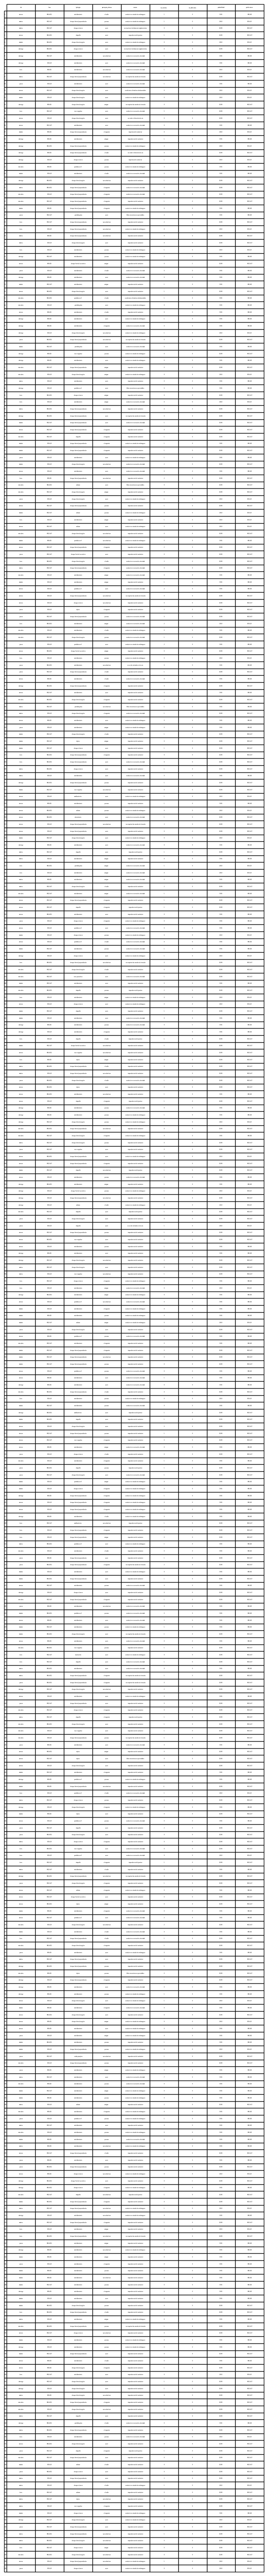

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 6))

# Eliminar marcas del eje
ax.axis('off')

# Crear la tabla a partir del DataFrame
tabla = pd.plotting.table(ax, probabilidades_2021_df, loc='center', cellLoc='center', fontsize=14)

# Guardar la tabla en un archivo PDF
with PdfPages('tabla_probabilidades_hora_2021.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight')


Guardamos el modelo del año 2021

In [93]:
from joblib import dump
dump(arbol_modelo, 'modelo_hora2021_python.joblib')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



['modelo_hora2021_python.joblib']

Creamos un nuevo dato para verificar la eficiencia del modelo y la probabilidad del dato

In [94]:
#Nuevos datos
import pandas as pd
import numpy as np

x_test = pd.DataFrame(columns=('dia', 'hora', 'tipologia', 'parroquia_urbana', 'causas', 'nro_heridos', 'nro_fallecidos'))
print(x_test)
x_test.loc[0] = (0, 4, 16, 4, 3, 1, 10)
print(x_test)
y_pred = arbol_modelo.predict(x_test.drop(['hora'], axis=1))
print("Predicción: " + str(y_pred))

y_proba = arbol_modelo.predict_proba(x_test.drop(['hora'], axis=1))
probabilidad_acierto = np.round(y_proba[0][y_pred] * 100, 2)
print("Probabilidad de Acierto: " + str(probabilidad_acierto) + "%")


Empty DataFrame
Columns: [dia, hora, tipologia, parroquia_urbana, causas, nro_heridos, nro_fallecidos]
Index: []
   dia  hora  tipologia  parroquia_urbana  causas  nro_heridos  nro_fallecidos
0    0     4         16                 4       3            1              10
Predicción: [2]
Probabilidad de Acierto: [55.56]%
